# Data Showcase and Manipulation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
wind_df = pd.read_csv('../data/wind.csv')
solar_df = pd.read_csv('../data/solar.csv')

wind_df.head(10)

In [6]:
solar_df.head(10)

In [4]:
wind_X = wind_df.loc[:, wind_df.columns[1:3]]
solar_X = solar_df.loc[:, solar_df.columns[1:3]]

In [8]:
K_clusters = range(1,100)

wind_kmeans = [KMeans(n_clusters=i, n_init='auto') for i in K_clusters]
wind_Y_axis = wind_X[['lat']]
wind_X_axis = wind_X[['long']]

solar_kmeans = [KMeans(n_clusters=i, n_init='auto') for i in K_clusters]
solar_Y_axis = solar_X[['lat']]
solar_X_axis = solar_X[['long']]

In [9]:
wind_score = [wind_kmeans[i].fit(wind_Y_axis).score(wind_Y_axis) for i in range(len(wind_kmeans))]

In [10]:
solar_score = [solar_kmeans[i].fit(solar_Y_axis).score(solar_Y_axis) for i in range(len(solar_kmeans))]

``` python
plt.plot(K_clusters, wind_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Wind Elbow Curve')
plt.show()

plt.plot(K_clusters, solar_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Solar Elbow Curve')
plt.show()
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-optimal-clusters-1">
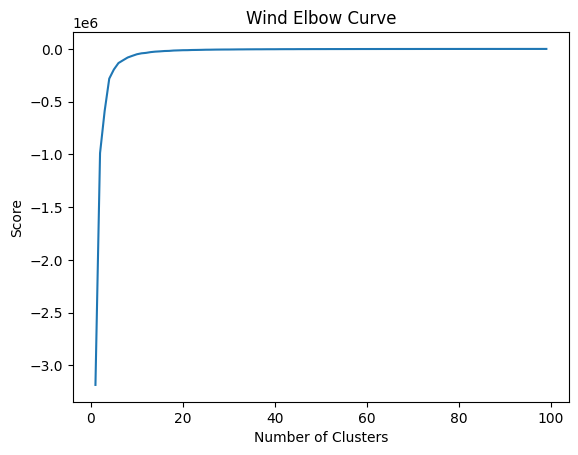
<figcaption>(a)</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-optimal-clusters-2">
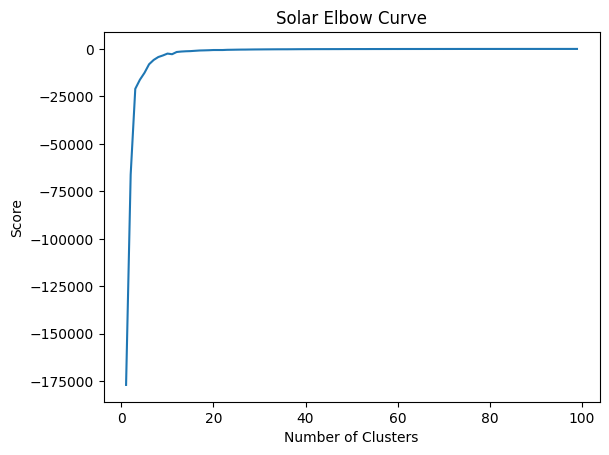
<figcaption>(b)</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

Figure 1

In [5]:
wind_n_clusters = 20
wind_kmeans = KMeans(wind_n_clusters, init='k-means++', n_init='auto')
wind_kmeans.fit(wind_X[wind_X.columns[0:2]])

solar_n_clusters = 20
solar_kmeans = KMeans(solar_n_clusters, init='k-means++', n_init='auto')
solar_kmeans.fit(solar_X[solar_X.columns[0:2]])

KMeans(n_clusters=20) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.   KMeans ? Documentation for KMeans i Fitted KMeans(n_clusters=20)

In [6]:
wind_X['cluster_label'] = wind_kmeans.fit_predict(wind_X[wind_X.columns[0:2]])
wind_X.head(10)

In [7]:
solar_X['cluster_label'] = solar_kmeans.fit_predict(solar_X[solar_X.columns[0:2]])
solar_X.head(10)

In [8]:
wind_centers = wind_kmeans.cluster_centers_
wind_labels = wind_kmeans.predict(wind_X[wind_X.columns[0:2]])

solar_centers = solar_kmeans.cluster_centers_
solar_labels = solar_kmeans.predict(solar_X[solar_X.columns[0:2]])

``` python
wind_X.plot.scatter(x = 'long', y = 'lat', c=wind_labels, s=50, cmap='viridis')
plt.scatter(wind_centers[:, 1], wind_centers[:, 0], c='black', s=200, alpha=0.5)
plt.title("Wind")
plt.show()

solar_X.plot.scatter(x = 'long', y = 'lat', c=solar_labels, s=50, cmap='viridis')
plt.scatter(solar_centers[:, 1], solar_centers[:, 0], c='black', s=200, alpha=0.5)
plt.title("Solar")
plt.show()
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-clustered-data-1">
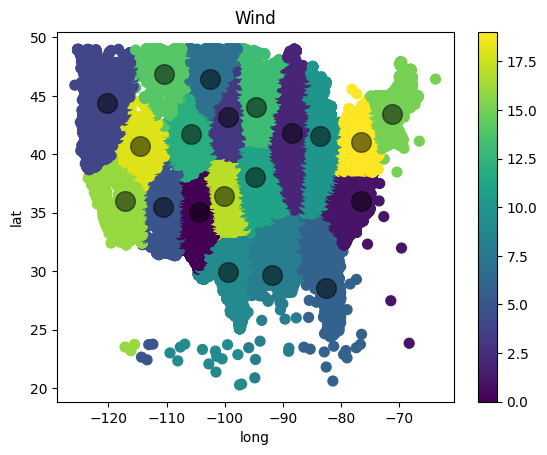
<figcaption>(a)</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-clustered-data-2">
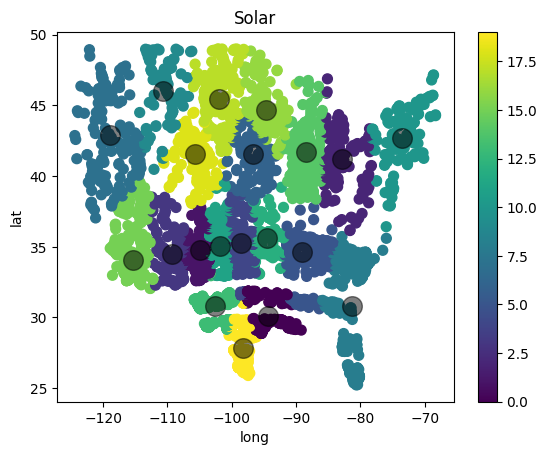
<figcaption>(b)</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

Figure 2

In [22]:
wind_df.drop('lat', axis=1, inplace=True)
solar_df.drop('lat', axis=1, inplace=True)

wind_df.long = wind_X.cluster_label
solar_df.long = solar_X.cluster_label

wind_df.rename(columns={"long":"cluster_id"}, inplace=True)
solar_df.rename(columns={"long":"cluster_id"}, inplace=True)

wind_df.to_csv('../data/wind_clustered.csv', index=None, header=True)
solar_df.to_csv('../data/solar_clustered.csv', index=None, header=True)